# Calling R in a Python Notebook

## Load and setup rpy2

In [1]:
import rpy2.rinterface

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext rpy2.ipython

## Running R in a cell

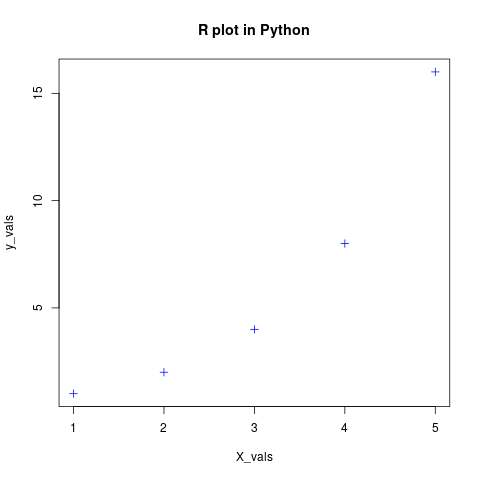

In [3]:
%%R
X_vals <- c(1,2,3,4,5)
y_vals <- c(1,2,4,8,16)

plot(X_vals, y_vals, col='blue', pch=3, main='R plot in Python')

## Moving objects from Python to R

We create the pandas dataframe to be loaded into R

In [4]:
np.random.seed(666)
A = np.random.randint(5, size=10)
mod = np.random.normal(size=10) + 2
B = A * mod
print(A)
print(B.round(2))

[4 2 1 4 3 3 4 4 1 0]
[10.56  2.43  2.61  4.28  8.93  3.79  6.81  6.16  0.91  0.  ]


In [5]:
python_df = pd.DataFrame({'A': A,
                          'B': B})
print(python_df)

   A          B
0  4  10.562293
1  2   2.427114
2  1   2.608870
3  4   4.275953
4  3   8.934667
5  3   3.789246
6  4   6.805070
7  4   6.157651
8  1   0.911207
9  0   0.000000


To use the dataframe in R, we have to specify the object to use in the header.

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


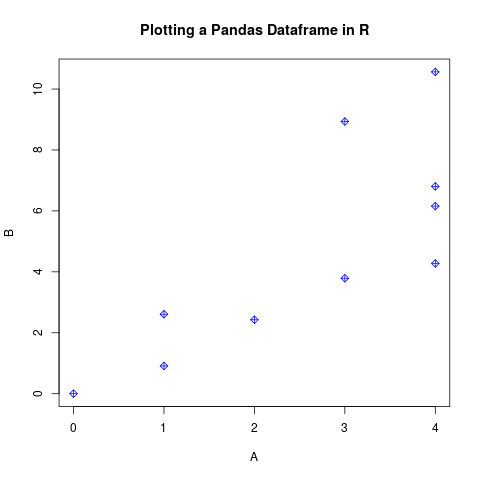

In [6]:
%%R -i python_df

# Use sink to suppress messages
plot(python_df, 
     main='Plotting a Pandas Dataframe in R', 
     col='blue', 
     pch=9)

## Moving objects from R to Python

One way for us to be able to use R objects in Python is to declare so in the cell header.

In [7]:
%%R -o model -o coefficients

model <- lm(B ~ A, data=python_df)
coefficients <- model$coefficients

After doing so, we are able to simply call those objects in Python as we would with regular python objects. Notice the datatype.

In [8]:
print(model)
print(type(model))
print('\n---\n')
print(coefficients)
print(type(coefficients))


Call:
lm(formula = B ~ A, data = python_df)

Coefficients:
(Intercept)            A  
   -0.05861      1.80993  


<class 'rpy2.robjects.vectors.ListVector'>

---

(Intercept)           A 
-0.05860516  1.80992769 

<class 'rpy2.robjects.vectors.FloatVector'>


Some objects, such as dataframes, are automatically transformed into their Python equivalent. Here, we load a dataframe in R and then use seaborn to visualize it, as we would with a regular pandas dataframe.

In [9]:
%%R -o cars_df

library(datasets)
cars_df <- cars

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [10]:
print(cars_df.head())

   speed  dist
0    4.0   2.0
1    4.0  10.0
2    7.0   4.0
3    7.0  22.0
4    8.0  16.0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


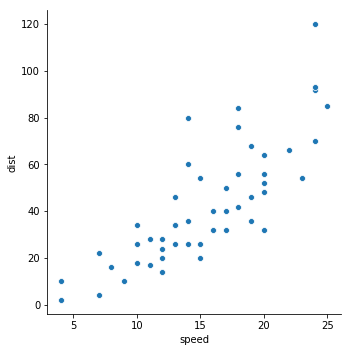

In [11]:
sns.pairplot(x_vars=['speed'], 
             y_vars=['dist'], 
             data=cars_df,
             size=5)
plt.show()

## Other options for sharing objects between R and Python

We can still use R objects in Python if we do not declare so in the header my manually calling them using %Rget

In [12]:
%%R

my_var = c(1:5)
my_var

[1] 1 2 3 4 5


In [13]:
my_python_var = %Rget my_var

print(my_python_var)
print(type(my_python_var))
print('\n---\n')
print(list(my_python_var))

[1] 1 2 3 4 5

<class 'rpy2.robjects.vectors.IntVector'>

---

[1, 2, 3, 4, 5]


Finally, we can push objects from Python to R using Rpush.

In [14]:
my_python_var2 = np.array([1, 2, 3, 4, 5])
my_python_var3 = np.array([1, 2, 4, 8, 16])

%Rpush my_python_var2 my_python_var3

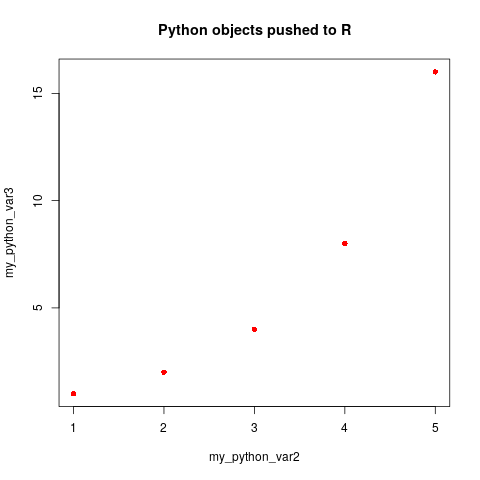

In [15]:
%%R
plot(my_python_var2, 
     my_python_var3,
     main='Python objects pushed to R', 
     col='red', 
     pch=16)